In [154]:
import numpy as np
import plotly.graph_objects as go

imu_data = np.loadtxt("/home/nuci7/project/cf2/crazyflie-firmware/control/data/imu_data_0103-1450.csv", delimiter=',')

# acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z, motor1, motor2, motor3, motor4, current_time, height
# Normalizing the PWM
imu_data[:,6:10] = imu_data[:,6:10]/((1<<16)-1)
# imu_data = imu_data[1500:,:]

In [155]:
import numpy as np
import matplotlib.pyplot as plt
data = imu_data[:,0]
fft_result = np.fft.fft(data)
amplitude_spectrum = 2.0 / len(data) * np.abs(fft_result[:len(data)//2])
sampling_rate = 100
freq = np.arange(len(data)) * (sampling_rate / len(data))
plt.plot(freq[:len(data)//2], amplitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [156]:
import scipy.signal as signal_p

# Define filter parameters
fs = 100  # Sampling frequency
fc = 4  # Cutoff frequency
order = 6  # Filter order



# Create low-pass Butterworth filter
b, a = signal_p.butter(order, fc / (fs / 2), btype='low')

# Apply filter to signal data
signalf = signal_p.filtfilt(b, a, imu_data[:,:6], axis=0)
timestamp = imu_data[:,-2]
fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,6],
                    mode='lines',
                    line=dict(width=0.5),
                    name='motor1'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,7],
                    mode='lines',
                    line=dict(width=0.5),
                    name='motor2'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,8],
                    mode='lines',
                    line=dict(width=0.5),
                    name='motor3'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,9],
                    mode='lines',
                    line=dict(width=0.5),
                    name='motor4'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,-1]/1000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='zrange'))


# # Add a rectangle to the plot
# fig.add_shape(type='rect',
#               x0=0,
#               y0=-2,
#               x1=10,
#               y1=2,
#               line=dict(color='blue', width=0.5),
#             #   fillcolor='lightblue',
#               opacity=0.5)

fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=timestamp[-1].astype(float),
                y1=0,
                line=dict(color='black', width=0.5),
            #   fillcolor='lightblue',
                opacity=1)

    
    


fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Normalized PWM',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 10,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

In [157]:
import scipy.signal as signal_p

# Define filter parameters
fs = 100  # Sampling frequency
fc = 4  # Cutoff frequency
order = 6  # Filter order



# Create low-pass Butterworth filter
b, a = signal_p.butter(order, fc / (fs / 2), btype='low')

# Apply filter to signal data
signalf = signal_p.filtfilt(b, a, imu_data[:,:6], axis=0)
timestamp = imu_data[:,-2]
fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,0],
                    mode='lines',
                    line=dict(width=0.5),
                    name='accX'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,1],
                    mode='lines',
                    line=dict(width=0.5),
                    name='accY'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,2],
                    mode='lines',
                    line=dict(width=0.5),
                    name='accZ'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,-1]/1000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='zrange'))


# # Add a rectangle to the plot
# fig.add_shape(type='rect',
#               x0=0,
#               y0=-2,
#               x1=10,
#               y1=2,
#               line=dict(color='blue', width=0.5),
#             #   fillcolor='lightblue',
#               opacity=0.5)

fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=timestamp[-1].astype(float),
                y1=0,
                line=dict(color='black', width=0.5),
            #   fillcolor='lightblue',
                opacity=1)

    
    


fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Acceleration m/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 10,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

In [158]:
np.mean(imu_data[1500:2500,2])

9838.368

In [159]:
import scipy.signal as signal_p

# Define filter parameters
fs = 100  # Sampling frequency
fc = 4  # Cutoff frequency
order = 6  # Filter order



# Create low-pass Butterworth filter
b, a = signal_p.butter(order, fc / (fs / 2), btype='low')

# Apply filter to signal data
signalf = signal_p.filtfilt(b, a, imu_data[:,:6], axis=0)
timestamp = imu_data[:,-2]
fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,3],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aX'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,4],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aY'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,5],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aZ'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,-1]/1000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='zrange'))


# # Add a rectangle to the plot
# fig.add_shape(type='rect',
#               x0=0,
#               y0=-2,
#               x1=10,
#               y1=2,
#               line=dict(color='blue', width=0.5),
#             #   fillcolor='lightblue',
#               opacity=0.5)

fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=timestamp[-1].astype(float),
                y1=0,
                line=dict(color='black', width=0.5),
            #   fillcolor='lightblue',
                opacity=1)

    
    


fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Amplitude m/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 10,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

In [160]:
# st = 2720
# on45 = imu_data[st-100:st+300,:]
# np.savetxt('/home/nuci7/project/cf2/crazyflie-firmware/control/train_data2/on45_10.txt', on45)

In [161]:
# import numpy as np
# import plotly.graph_objects as go

# imu_data = np.loadtxt("/home/nuci7/project/cf2/crazyflie-firmware/control/train_data2/on45_7.txt", delimiter=' ')

In [162]:
# import numpy as np
# from scipy.signal import butter, filtfilt

# def butter_lowpass_filter(data, cutoff_freq, sampling_freq, order=5):
#     def butter_lowpass(cutoff_freq, sampling_freq, order=5):
#         nyquist_freq = 0.5 * sampling_freq
#         normal_cutoff = cutoff_freq / nyquist_freq
#         b, a = butter(order, normal_cutoff, btype='low', analog=False)
#         return b, a

#     def apply_lowpass_filter(data, cutoff_freq, sampling_freq, order=5):
#         b, a = butter_lowpass(cutoff_freq, sampling_freq, order=order)
#         filtered_data = filtfilt(b, a, data)
#         return filtered_data

#     filtered_data = apply_lowpass_filter(data, cutoff_freq, sampling_freq, order=order)
#     return filtered_data
# imu_data = imu_data[:,:7]

# # 设置截止频率和采样频率
# cutoff_freq = 50  # 截止频率为2Hz
# sampling_freq = 200  # 采样频率为10Hz
# # 应用低通滤波器
# imu_data1 = butter_lowpass_filter(imu_data[:,0], cutoff_freq, sampling_freq, order=5)
# imu_data2 = butter_lowpass_filter(imu_data[:,1], cutoff_freq, sampling_freq, order=5)
# imu_data3 = butter_lowpass_filter(imu_data[:,2], cutoff_freq, sampling_freq, order=5)

In [163]:
import scipy.signal as signal_p

# Define filter parameters
fs = 100  # Sampling frequency
fc = 40  # Cutoff frequency
order = 6  # Filter order
# Create low-pass Butterworth filter
b, a = signal_p.butter(order, fc / (fs / 2), btype='low')

# Apply filter to signal data
signalf = signal_p.filtfilt(b, a, imu_data[:,:11], axis=0)
timestamp = imu_data[:,-2]
fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp, y=signalf[:,3],
                    mode='lines',
                    line=dict(width=0.5),
                    name='gyroX'))
fig.add_trace(go.Scatter(x=timestamp, y=signalf[:,4],
                    mode='lines',
                    line=dict(width=0.5),
                    name='gyroY'))
fig.add_trace(go.Scatter(x=timestamp, y=signalf[:,5],
                    mode='lines',
                    line=dict(width=0.5),
                    name='gyroZ'))

fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,-1]/1000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='zrange'))


# # Add a rectangle to the plot
# fig.add_shape(type='rect',
#               x0=0,
#               y0=-2,
#               x1=10,
#               y1=2,
#               line=dict(color='blue', width=0.5),
#             #   fillcolor='lightblue',
#               opacity=0.5)

fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=timestamp[-1].astype(float),
                y1=0,
                line=dict(color='black', width=0.5),
            #   fillcolor='lightblue',
                opacity=1)

    
    


fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Angular acceleration rad/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 10,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

In [164]:
14*290/400

10.15

In [165]:
def quatdecompress(comp):
    q = np.zeros(4)
    mask = (1 << 9) - 1
    i_largest = comp >> 30
    sum_squares = 0
    for i in range(3, -1, -1):
        if i != i_largest:
            mag = comp & mask
            negbit = (comp >> 9) & 0x1
            comp = comp >> 10
            q[i] = mag / mask / np.sqrt(2)
            if negbit == 1:
                q[i] = -q[i]
            sum_squares += q[i] * q[i]
    q[i_largest] = np.sqrt(1.0 - sum_squares)
    return q

q = quatdecompress(3463829145)

In [166]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import stft

# # 准备数据
# t = np.linspace(0, 1, 1000)  # 时间轴
# x = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)  # 信号
# fs=100
# nperseg=200
# noverlap=170
# # 进行短时傅里叶变换
# f, t, Zxx = stft(imu_data[:,0], fs=fs, nperseg=nperseg, noverlap=noverlap)
# #f, t, Zxx = stft(x, fs=200, nperseg=200, noverlap=170)
# # 绘制幅度谱
# plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')
# plt.colorbar(label='Amplitude')
# plt.title(f'STFT Amplitude Spectrum at time sampling rate {len(t)/t[-1]:.1f} Hz')
# plt.xlabel('Time')
# plt.ylabel('Frequency')
# plt.show()


# # print(np.shape(Zxx))
# dd = np.abs(Zxx)
# pp = np.sum(dd, axis=0)
# time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
# plt.plot(time_vector,pp)




# plt.figure()
# acc_z3power = np.sum(abs(Zxx[12:17,:]),axis=0)
# acc_z3power[:int(len(acc_z3power)*0.1)] = np.zeros(int(len(acc_z3power)*0.1))
# acc_z3power[-int(len(acc_z3power)*0.1):] = np.zeros(int(len(acc_z3power)*0.1))
# plt.plot(time_vector, acc_z3power)
# # plt.plot(np.sum(abs(Zxx[12:17,:]),axis=0))
# plt.show()

In [167]:
import matplotlib.pyplot as plt
from scipy.signal import stft
t = np.linspace(0, 1, 1000)  # 时间轴
x = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)  # 信号
fs=100
nperseg=200
noverlap=199
# 进行短时傅里叶变换
f, t, Zxx = stft(imu_data[:,0], fs=100, nperseg=nperseg, noverlap=noverlap)



# 创建一个包含3行6列的子图布局
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(28, 8))

# 绘制第1个子图
f, t, Zxx = stft(imu_data[:,0], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 0].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 0].set_title('acc_x')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 0].plot(time_vector, pp)
axes[1, 0].set_title('acc_x')

axes[2, 0].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 0].set_title('acc_x')


# 绘制第2个子图
f, t, Zxx = stft(imu_data[:,1], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 1].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 1].set_title('acc_y')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 1].plot(time_vector, pp)
axes[1, 1].set_title('acc_y')

axes[2, 1].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 1].set_title('acc_y')



# 绘制第3个子图
f, t, Zxx = stft(imu_data[:,2], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 2].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 2].set_title('acc_z')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 2].plot(time_vector, pp)
axes[1, 2].set_title('acc_z')

acc_z3power = np.sum(abs(Zxx[12:17,:]**2),axis=0)
acc_z3power[:int(len(acc_z3power)*0.25)] = np.zeros(int(len(acc_z3power)*0.25))
acc_z3power[-int(len(acc_z3power)*0.05):] = np.zeros(int(len(acc_z3power)*0.05))
axes[2, 2].plot(time_vector, acc_z3power)
axes[2, 2].set_title('acc_z')


# 绘制第4个子图
f, t, Zxx = stft(imu_data[:,3], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 3].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 3].set_title('gyro_x')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 3].plot(time_vector, pp)
axes[1, 3].set_title('gyro_x')

axes[2, 3].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 3].set_title('gyro_x')


# 绘制第5个子图
f, t, Zxx = stft(imu_data[:,4], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 4].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 4].set_title('gyro_y')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 4].plot(time_vector, pp)
axes[1, 4].set_title('gyro_y')

axes[2, 4].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 4].set_title('gyro_y')



# 绘制第6个子图
f, t, Zxx = stft(imu_data[:,5], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 5].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 5].set_title('gyro_z')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 5].plot(time_vector, pp)
axes[1, 5].set_title('gyro_z')

axes[2, 5].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 5].set_title('gyro_z')



# 绘制第7个子图
f, t, Zxx = stft(imu_data[:,7]-imu_data[:,6], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 6].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 6].set_title('motor2-1')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 6].plot(time_vector, pp)
axes[1, 6].set_title('motor2-1')

axes[2, 6].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 6].set_title('motor2-1')


# 绘制第8个子图
f, t, Zxx = stft(imu_data[:,8]-imu_data[:,6], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 7].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 7].set_title('motor3-1')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 7].plot(time_vector, pp)
axes[1, 7].set_title('motor3-1')

axes[2, 7].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 7].set_title('motor3-1')


# 绘制第9个子图
f, t, Zxx = stft(imu_data[:,9]-imu_data[:,6], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 8].pcolormesh(t, f, np.abs(Zxx)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 8].set_title('motor4-1')
pp = np.sum(np.abs(Zxx), axis=0)
time_vector = np.arange(len(pp)) *((nperseg-noverlap)/fs)
axes[1, 8].plot(time_vector, pp)
axes[1, 8].set_title('motor4-1')

axes[2, 8].plot(time_vector, np.sum(abs(Zxx[12:17,:]**2),axis=0))
axes[2, 8].set_title('motor4-1')


plt.suptitle(f'time sampling rate {len(t)/t[-1]:.1f} Hz')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


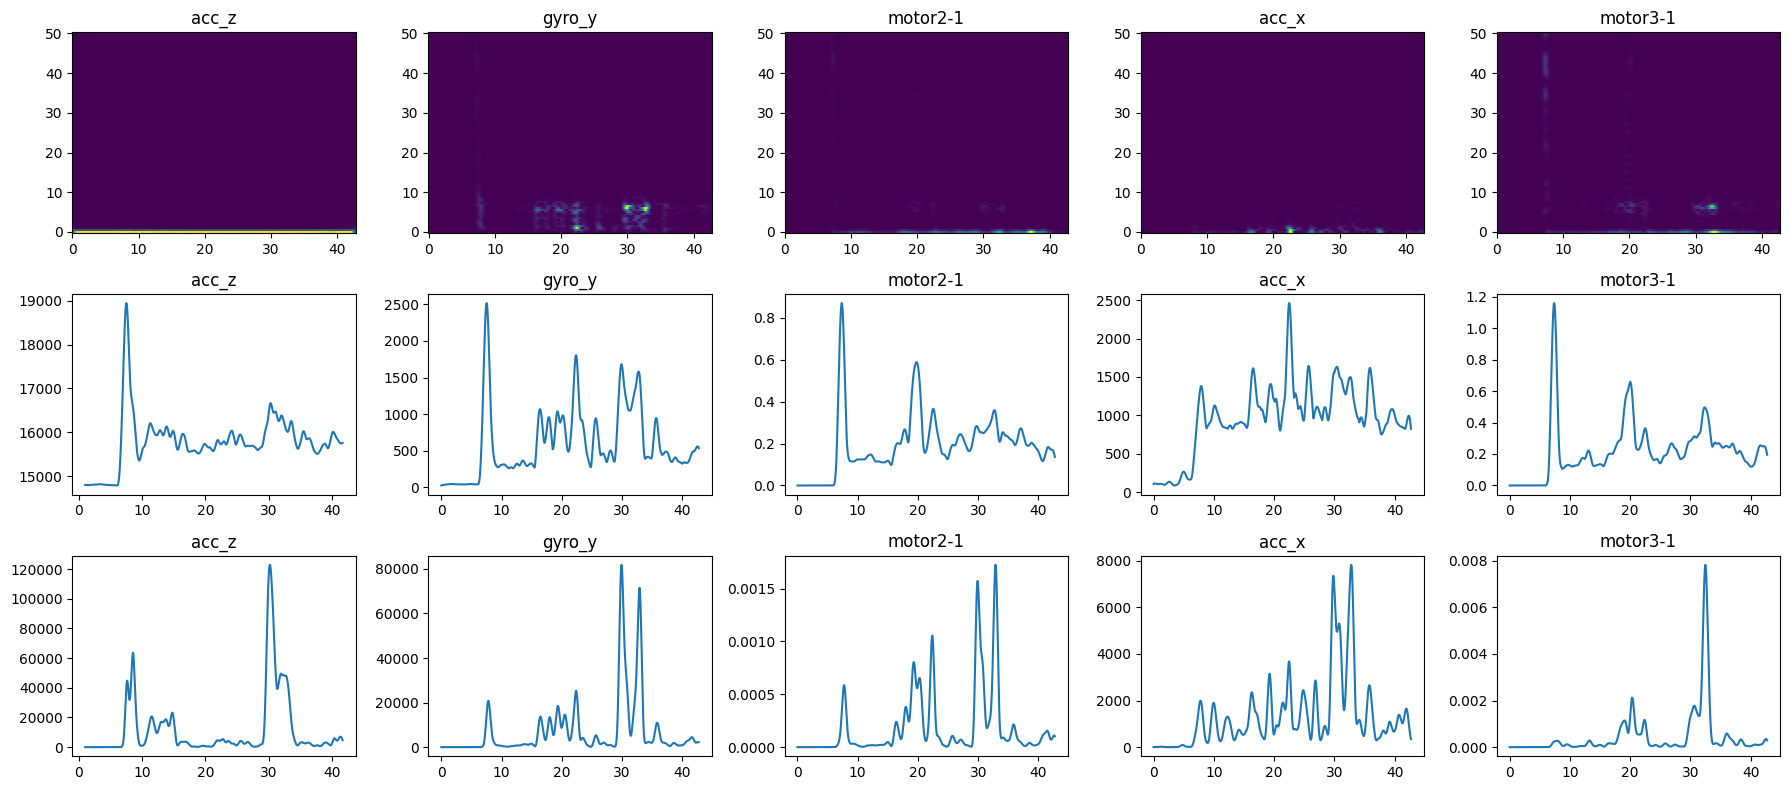

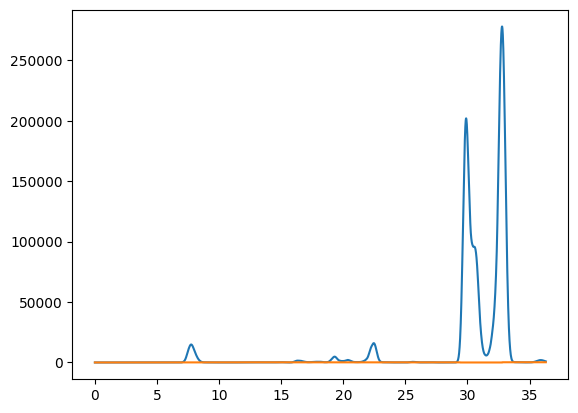

In [168]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 8))


f1, t1, Zxx1 = stft(imu_data[:,2], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm1 = axes[0, 0].pcolormesh(t1, f1, np.abs(Zxx1)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 0].set_title('acc_z')
pp1 = np.sum(np.abs(Zxx1), axis=0)
time_vector = np.arange(len(pp1)) *((nperseg-noverlap)/fs)
axes[1, 0].plot(time_vector[100:-100], pp1[100:-100])
axes[1, 0].set_title('acc_z')

axes[2, 0].plot(time_vector[100:-100], np.sum(abs(Zxx1[3:5,:]**2),axis=0)[100:-100])


# acc_z3power = np.sum(abs(Zxx1[12:17,:]**2),axis=0)
# acc_z3power[:int(len(acc_z3power)*0.25)] = np.zeros(int(len(acc_z3power)*0.25))
# acc_z3power[-int(len(acc_z3power)*0.05):] = np.zeros(int(len(acc_z3power)*0.05))
# axes[2, 0].plot(time_vector, acc_z3power)
axes[2, 0].set_title('acc_z')


f2, t2, Zxx2 = stft(imu_data[:,4], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm2 = axes[0, 1].pcolormesh(t2, f2, np.abs(Zxx2)**2, shading='auto')
# cbar = fig.colorbar(:int(len(gh1)*0.85)pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 1].set_title('gyro_y')
pp2 = np.sum(np.abs(Zxx2), axis=0)
time_vector = np.arange(len(pp2)) *((nperseg-noverlap)/fs)
axes[1, 1].plot(time_vector, pp2)
axes[1, 1].set_title('gyro_y')

axes[2, 1].plot(time_vector, np.sum(abs(Zxx2[12:17,:]**2),axis=0))
axes[2, 1].set_title('gyro_y')


f3, t3, Zxx3 = stft(imu_data[:,7]-imu_data[:,6], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 2].pcolormesh(t, f, np.abs(Zxx3)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 2].set_title('motor2-1')
pp3 = np.sum(np.abs(Zxx3), axis=0)
time_vector = np.arange(len(pp3)) *((nperseg-noverlap)/fs)
axes[1, 2].plot(time_vector, pp3)
axes[1, 2].set_title('motor2-1')

axes[2, 2].plot(time_vector, np.sum(abs(Zxx3[12:17,:]**2),axis=0))
axes[2, 2].set_title('motor2-1')



f4, t4, Zxx4 = stft(imu_data[:,0], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 3].pcolormesh(t, f, np.abs(Zxx4)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 3].set_title('acc_x')
pp4 = np.sum(np.abs(Zxx4), axis=0)
time_vector = np.arange(len(pp4)) *((nperseg-noverlap)/fs)
axes[1, 3].plot(time_vector, pp4)
axes[1, 3].set_title('acc_x')

axes[2, 3].plot(time_vector, np.sum(abs(Zxx4[12:17,:]**2),axis=0))
axes[2, 3].set_title('acc_x')




f5, t5, Zxx5 = stft(imu_data[:,8]-imu_data[:,6], fs=100, nperseg=nperseg, noverlap=noverlap)
pcm = axes[0, 4].pcolormesh(t, f, np.abs(Zxx5)**2, shading='auto')
# cbar = fig.colorbar(pcm, ax=axes[0, 0], label='Amplitude')
axes[0, 4].set_title('motor3-1')
pp5 = np.sum(np.abs(Zxx5), axis=0)
time_vector = np.arange(len(pp5)) *((nperseg-noverlap)/fs)
axes[1, 4].plot(time_vector, pp5)
axes[1, 4].set_title('motor3-1')

axes[2, 4].plot(time_vector, np.sum(abs(Zxx5[12:17,:]**2),axis=0))
axes[2, 4].set_title('motor3-1')

plt.tight_layout()
plt.show()

gh1 = np.sum(abs(Zxx1[3:5,:]),axis=0)
gh2 = np.sum(abs(Zxx2[12:17,:]),axis=0)
gh3 = np.sum(abs(Zxx3[12:17,:]),axis=0)
gh4 = np.sum(abs(Zxx4[12:17,:]),axis=0)
gh5 = np.sum(abs(Zxx5[12:17,:]),axis=0)
plt.figure()

# plt.plot(time_vector[:int(len(gh1)*0.85)],gh1[:int(len(gh1)*0.85)])
# plt.plot(time_vector[:int(len(gh1)*0.85)],gh2[:int(len(gh1)*0.85)])
# plt.plot(time_vector[:int(len(gh1)*0.85)],gh3[:int(len(gh1)*0.85)])
plt.plot(time_vector[:int(len(gh1)*0.85)],gh1[:int(len(gh1)*0.85)]*gh2[:int(len(gh1)*0.85)]*gh3[:int(len(gh1)*0.85)]*gh4[:int(len(gh1)*0.85)]*gh5[:int(len(gh1)*0.85)])
plt.plot(time_vector[:int(len(gh1)*0.85)], 1/4*1e0*imu_data[np.linspace(0,len(imu_data)-1,len(time_vector)).astype(int)[:int(len(gh1)*0.85)],11])



# plt.figure()
# plt.plot(time_vector[:int(len(gh1)*0.85)],gh1[:int(len(gh1)*0.85)]+gh2[:int(len(gh1)*0.85)]+gh3[:int(len(gh1)*0.85)]+gh4[:int(len(gh1)*0.85)]+gh5[:int(len(gh1)*0.85)])
# # plt.plot(time_vector[:int(len(gh1)*0.85)], 1e0*imu_data[np.linspace(0,len(imu_data)-1,len(time_vector)).astype(int)[:int(len(gh1)*0.85)],11])


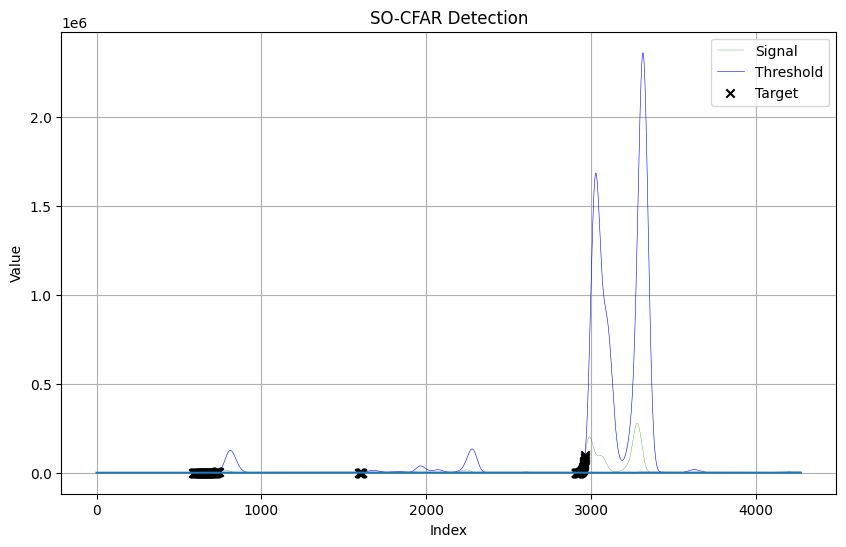

In [169]:
import numpy as np
import matplotlib.pyplot as plt

def cfar_so(xc, N, pro_N, PAD):
    # 假设回波服从高斯分布
    alpha = N * (PAD ** (-1 / N) - 1)
    target = []
    index = np.arange(1 + N/2 + pro_N/2, len(xc) - N/2 - pro_N/2)
    XT = np.zeros(len(index))

    for i in index:
        cell_left = xc[int(i - N/2 - pro_N/2) : int(i - pro_N/2)]
        # cell_right = xc[int(i + pro_N/2 + 1) : int(i + N/2 + pro_N/2 + 1)]
        cell_right = 1e10
        Z = np.min([np.mean(cell_left), np.mean(cell_right)])
        # print(alpha)
        XT[int(i - N/2 - pro_N/2-1)] = Z * alpha
        if xc[int(i)] > Z * alpha:
            target.append(int(i))
    return index, XT, target

# 均匀背景噪声
def env_uniform(variance, shape, power_db, show_out=False):
    if not show_out:
        show_out = 0

    c = 10**(power_db/10)  # 这里是幅度——功率，实际的噪声功率
    xc = c + np.random.normal(0, variance, shape)  # 产生一个正态分布/高斯分布的噪声，期望为0，标准差为variance，shape形状的数组

    if show_out:
        plt.figure()
        plt.plot(10 * np.log10(np.abs(xc)) / np.log10(10))
        plt.show()

    return xc

# 设置参数

N = 100
pro_N =20
PAF = 1e-4

# 生成噪声信号
# variance = 200
# shape = (200,)
# noise_db = 20
# noise_p = 10**(noise_db/10)
# xc = env_uniform(variance, shape, noise_db)

# # 添加信号
# signal1_p = 10**(SNR1/10) * noise_p
# xc[89] = signal1_p
# xc = gh1[:int(len(gh1)*0.85)]*gh2[:int(len(gh1)*0.85)]*gh3[:int(len(gh1)*0.85)]
xc = gh1[:int(len(gh1)*0.85)]*gh2[:int(len(gh1)*0.85)]*gh3[:int(len(gh1)*0.85)]*gh4[:int(len(gh1)*0.85)]*gh5[:int(len(gh1)*0.85)]
xc = gh1*gh2*gh3*gh4*gh5
# xc = imu_data[:,0]
# 应用CFAR算法
index, XT, target_idx = cfar_so(xc, N, pro_N, PAF)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(np.abs(xc), 'g',linewidth=0.2, label='Signal')
plt.plot(index, (XT), 'b', linewidth=0.4, label='Threshold')
plt.scatter(target_idx, XT[np.array(target_idx)-int(N/2+pro_N/2)-1], color='black', marker='x', label='Target', zorder=2)
plt.plot(imu_data[:,-1])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SO-CFAR Detection')
plt.legend()
plt.grid(True)
plt.show()

max_threshold = np.max(XT)
max_threshold_index = np.argmax(XT)

# 从阈值最大点向左搜索第一个目标点
first_target_index = None
for i in range(max_threshold_index+100, -1, -1):
    if i in target_idx:
        first_target_index = i
        break
# version 1    
# t_sta = first_target_index/1000
# t_sam = ((nperseg-noverlap)/fs)
# t_sta_num = round(t_sta/t_sam)
# t_stop_num = None
# for j in range(t_sta_num, 4000, 1):
#     if pp[j]<pp[t_sta_num]:
#         t_stop_num = j
#         break
# t_stop = t_stop_num*t_sam
# t_sta,t_stop
# version 2    
# t_sta = first_target_index/1000
# stop_target_index = None
# for j in range(first_target_index, 3500, 1):
#     print(XT[j-1])
#     if XT[j-1]+max_threshold/3<XT[first_target_index]:
#         stop_target_index = j-1
#         break
# t_stop = stop_target_index/1000
# t_sta,t_stop

In [170]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=np.abs(xc),
                    mode='lines',
                    line=dict(width=0.5),
                    name='gyroX'))
fig.add_trace(go.Scatter(x=index, y=(XT),
                    mode='lines',
                    line=dict(width=0.5),
                    name='gyroY'))

fig.add_trace(go.Scatter(y=imu_data[:,-1],
                    mode='lines',
                    line=dict(width=0.5),
                    name='gyroY'))

# plt.scatter(target_idx, XT[np.array(target_idx)-int(N/2+pro_N/2)-1], color='black', marker='x', label='Target', zorder=2)

fig.add_trace(go.Scatter(x=target_idx, y=XT[np.array(target_idx)-int(N/2+pro_N/2)-1],
                    mode='markers',
                    line=dict(width=0.5),
                    # color='k',
                    name='zrange'))

fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Angular acceleration rad/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 10,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# imu_data = np.loadtxt("/home/nuci7/project/cf2/crazyflie-firmware/control/data/imu_data_0126-2028.csv", delimiter=',')

# acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z, motor1, motor2, motor3, motor4, current_time, height
# Normalizing the PWM
# imu_data[:,6:10] = imu_data[:,6:10]/((1<<16)-1)


import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 原始数据
x = np.linspace(0-6.25,93.75,int(93.75/6.25)+2)
y = np.array([-5000, 0, 4485, 7570, 9374, 10885, 12277, 13522, 14691, 15924, 17174, 18179, 19397, 20539, 21692, 22598, 23882])

# 定义多项式函数
def func(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# 进行曲线拟合
params, params_covariance = curve_fit(func, x, y)

# 提取拟合参数
a = params[0]
b = params[1]
c = params[2]
d = params[3]
e = params[4]

# 生成拟合曲线的x值
x_fit = np.linspace(x.min(), x.max(), 100)

# 计算拟合曲线的y值
y_fit = func(x_fit, a, b, c, d, e)

# 绘制原始数据和拟合曲线
# plt.plot(x, y, 'ro', label='Original Data')
# plt.plot(x_fit, y_fit, 'b-', label='Fitted Curve')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()
RPM = func(np.asarray(imu_data[:,6:10]*100), a, b, c, d, e)

# Convert quaternion to rotation matrix
def rotation_matrix(quat):
    rot_mat = np.ones([3,3])
    a = quat[0]**2
    b = quat[1]**2
    c = quat[2]**2
    d = quat[3]**2
    e = quat[0]*quat[1]
    f = quat[0]*quat[2]
    g = quat[0]*quat[3]
    h = quat[1]*quat[2]
    i = quat[1]*quat[3]
    j = quat[2]*quat[3]
    rot_mat[0,0] = a - b - c + d
    rot_mat[0,1] = 2 * (e - j)
    rot_mat[0,2] = 2 * (f + i)
    rot_mat[1,0] = 2 * (e + j)
    rot_mat[1,1] = -a + b - c + d
    rot_mat[1,2] = 2 * (h - g)
    rot_mat[2,0] = 2 * (f - i)
    rot_mat[2,1] = 2 * (h + g)
    rot_mat[2,2] = -a - b + c + d
    
    return rot_mat


# 创建旋转矩阵
def rpy2Rotation(roll, pitch, yaw):
    rotation_matrix = np.array([
        [np.cos(yaw)*np.cos(pitch), -np.sin(yaw)*np.cos(roll) + np.cos(yaw)*np.sin(pitch)*np.sin(roll), np.sin(yaw)*np.sin(roll) + np.cos(yaw)*np.sin(pitch)*np.cos(roll)],
        [np.sin(yaw)*np.cos(pitch), np.cos(yaw)*np.cos(roll) + np.sin(yaw)*np.sin(pitch)*np.sin(roll), -np.cos(yaw)*np.sin(roll) + np.sin(yaw)*np.sin(pitch)*np.cos(roll)],
        [-np.sin(pitch), np.cos(pitch)*np.sin(roll), np.cos(pitch)*np.cos(roll)]
    ])
    return rotation_matrix
R = np.zeros([imu_data.shape[0], 3, 3])
for i in range(imu_data.shape[0]):
    R[i, :, :] = rotation_matrix([0,0,0,1])


m = 0.0362 # mass
# g = 9.81 # gravity
g = 9.83 # gravity
rho = 1.225 # air density
D = 0.0505  # diameter of the rotor
rpm2rs = 60 ** 2

C_t_fixed = 0.09937873049125099
# C_t_fixed = 0.12037873049125099
Fa = np.zeros([imu_data.shape[0], 3])
F = R[:, :, 2]




for i in range(imu_data.shape[0]):
    F_whole = m * imu_data[i, 0:3]/1000  # G = mg
    # temp[2] += m * g
    r_square = RPM[i, 0]**2 + RPM[i, 1]**2 + RPM[i, 2]**2 + RPM[i, 3]**2
    # r_square = RPM[i, 0]**2*4
    thrust = C_t_fixed / rpm2rs * rho * D ** 4 * r_square # c_t = C_t_fixed / rpm2rs * rho * D ** 4. r_square = n**2+n**2+n**2+n**2
    Fa[i, :] = F_whole - thrust * F[i, :]


    fig = go.Figure()
fig.add_trace(go.Scatter(y=np.abs(xc),
                    mode='lines',
                    line=dict(width=0.5),
                    name='gyroX'))
fig.add_trace(go.Scatter(x=index, y=(XT),
                    mode='lines',
                    line=dict(width=0.5),
                    name='gyroY'))
fig.add_trace(go.Scatter(y=Fa[:,2]*100000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='FaZ'))

fig.add_trace(go.Scatter(y=imu_data[:,-1],
                    mode='lines',
                    line=dict(width=0.5),
                    name='gyroY'))



fig.add_trace(go.Scatter(x=target_idx, y=XT[np.array(target_idx)-int(N/2+pro_N/2)-1],
                    mode='markers',
                    line=dict(width=0.5),
                    # color='k',
                    name='zrange'))

fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Angular acceleration rad/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 10,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

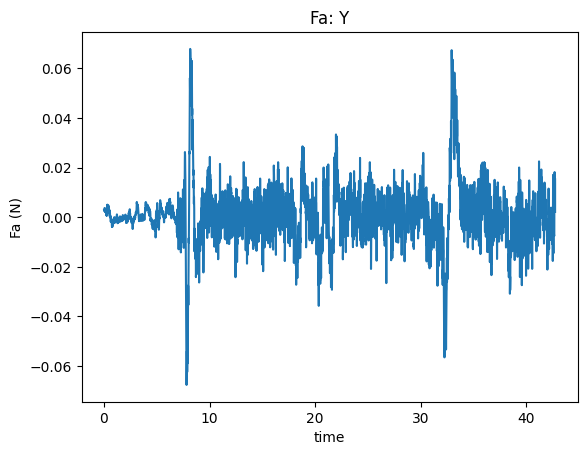

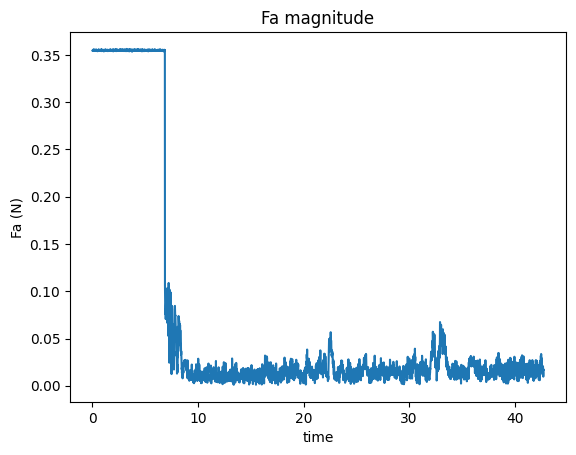

In [172]:
line1, = plt.plot(imu_data[:,-2], Fa[:, 0])
plt.title("Fa: X")
plt.ylabel("Fa (N)")
plt.show()

line1, = plt.plot(imu_data[:,-2], Fa[:, 1])
plt.title("Fa: Y")
plt.xlabel("time")
plt.ylabel("Fa (N)")
plt.show()

plt.figure()
# line1, = plt.plot(imu_data[1500:,-2], Fa[1500:, 2])
# line1, = plt.plot(imu_data[1500:,-2], imu_data[1500:,-1]/10000)
line1, = plt.plot(imu_data[:,-2], Fa[:,2])
# line1, = plt.plot(imu_data[:,-2], imu_data[:,-1]/10000)
plt.title("Fa: Z")
plt.xlabel("time")
plt.ylabel("Fa (N)")
plt.show()

Fa_norm = np.zeros(imu_data[:,-2].shape[0])
for i in range(imu_data[:,-2].shape[0]):
    Fa_norm[i] = np.linalg.norm(Fa[i, :])
line1, = plt.plot(imu_data[:,-2], Fa_norm)
plt.title("Fa magnitude")
plt.xlabel("time")
plt.ylabel("Fa (N)")
plt.show()

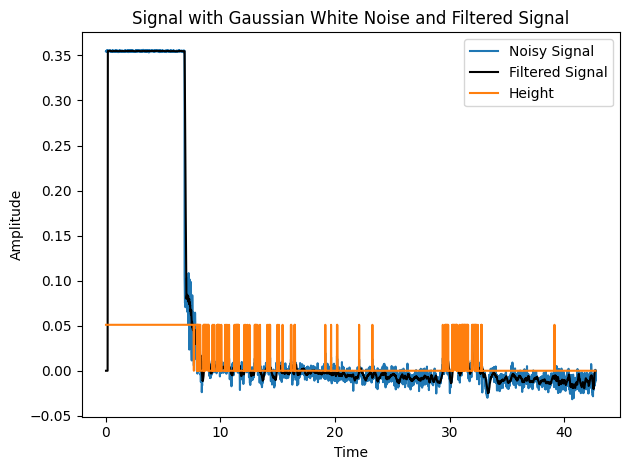

In [173]:
noisy_signal = Fa[:,2]
# 使用均值滤波进行降噪
window_size = 15
filtered_signal = np.zeros_like(noisy_signal)
filtered_signal2 = np.zeros_like(filtered_signal)
for i in range(window_size, len(noisy_signal) - window_size):
    filtered_signal[i] = np.mean(noisy_signal[i - window_size:i])
    filtered_signal2[i] = np.mean(filtered_signal[i - window_size:i])
plt.plot(imu_data[:,-2], noisy_signal)
plt.plot(imu_data[:,-2], filtered_signal, color='k')




new_signal = np.zeros_like(filtered_signal)
new_signal[noisy_signal>0.01] = 0.051
plt.plot(imu_data[:,-2],new_signal)

# plt.plot(imu_data[1000:,-2], filtered_signal2)

# plt.plot(imu_data[:,-2], imu_data[:,-1]/10000)

plt.legend(['Noisy Signal', 'Filtered Signal','Height'])
plt.title('Signal with Gaussian White Noise and Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [175]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=np.abs(xc),
                    mode='lines',
                    line=dict(width=0.5),
                    name='signal'))
fig.add_trace(go.Scatter(y=new_signal*100000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='Step1'))
fig.add_trace(go.Scatter(y=Fa[:,2]*100000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='FaZ'))

fig.add_trace(go.Scatter(y=imu_data[:,-1]*10,
                    mode='lines',
                    line=dict(width=0.5),
                    name='height'))



fig.add_trace(go.Scatter(x=target_idx, y=XT[np.array(target_idx)-int(N/2+pro_N/2)-1],
                    mode='markers',
                    line=dict(width=0.5),
                    # color='k',
                    name='CFAR_Target'))

fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Angular acceleration rad/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 1000,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()